In [12]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
%matplotlib inline

In [13]:
# load results
#results = pickle.load( open( "results_exp_mnist_low_sample.p", "rb" ) )
# if the file is saved from python 2
results = pickle.load(open("results_exp_mnist_full.p", "rb"), encoding='latin1')
deltalist = results[0]
powerlist = results[1]
powerlist_oracle = results[2]

cdflist = results[3]
cdflist_oracle = results[4]

powerlist_x = results[5]
cdflist_x = results[6]

powerlistT = np.array(powerlist).T

print(powerlistT)

print(powerlist_x)

[[ 0.022  0.128  0.332  0.208  0.598  0.162  0.644  0.49   0.502  0.8  ]
 [ 0.026  0.12   0.336  0.206  0.806  0.71   0.81   0.614  0.692  0.806]
 [ 0.046  0.104  0.252  0.204  0.778  0.746  0.716  0.888  0.878  0.964]
 [ 0.058  0.08   0.294  0.208  0.724  0.88   0.846  0.904  0.81   0.976]
 [ 0.048  0.076  0.302  0.262  0.774  0.672  0.866  0.972  0.866  0.982]]
[0.02, 0.089999999999999997, 0.060000000000000005, 0.13, 0.14000000000000001, 0.26000000000000001, 0.23000000000000001, 0.38, 0.12, 0.28000000000000003]


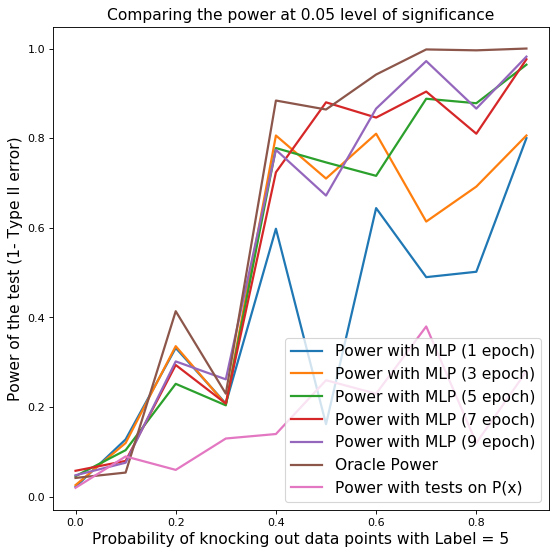

In [15]:
#plot figures
fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

num_epoch = 1
legendslist=[]
# plot the comparison
for item in powerlistT:
    plt.plot(deltalist,item,linewidth=2)
    legendslist.append('Power with MLP ('+repr(num_epoch)+' epoch)')
    num_epoch += 2
    
plt.plot(deltalist,powerlist_oracle,linewidth=2)

plt.plot(deltalist,powerlist_x,linewidth=2)

legendslist.append('Oracle Power')
legendslist.append('Power with tests on P(x)')
plt.xlabel('Probability of knocking out data points with Label = 5', fontsize=14)
plt.ylabel('Power of the test (1- Type II error)',fontsize=14)
plt.legend(legendslist, loc='best',fontsize=14)

plt.title('Comparing the power at 0.05 level of significance',fontsize=14)

plt.show()

#fig.savefig("Hypothesis-Testing-power-as-we-train-more.pdf", bbox_inches='tight')

In [10]:
# plot the QQ-plot for different levels

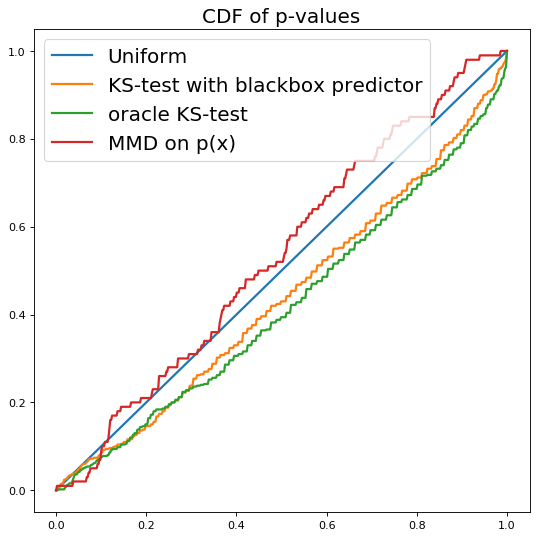

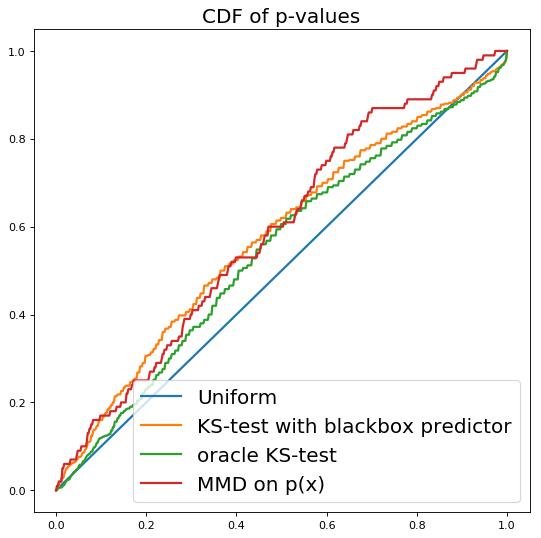

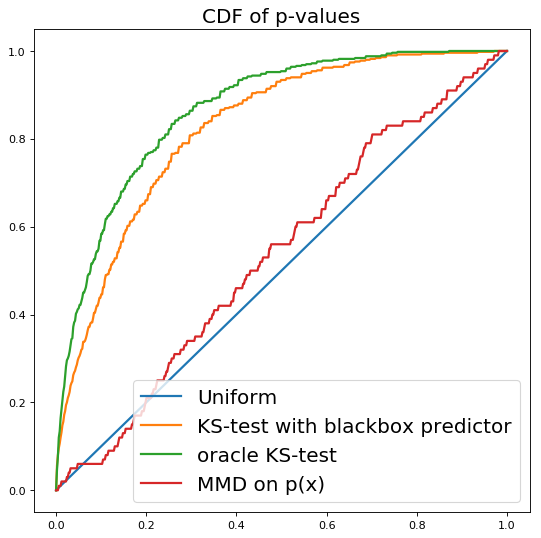

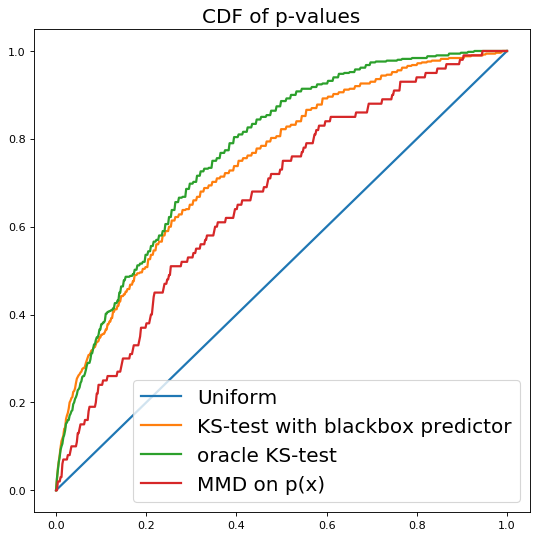

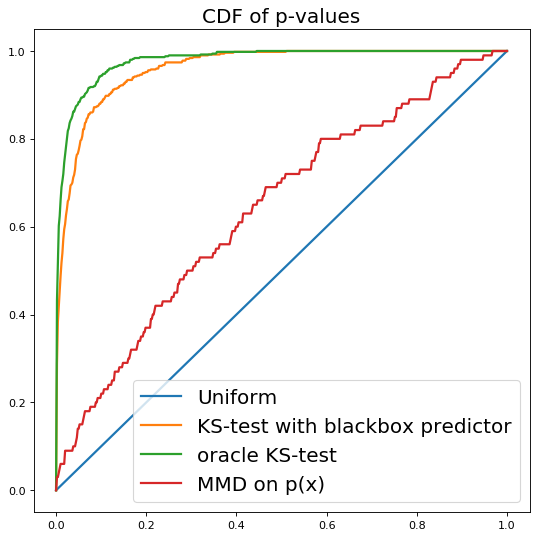

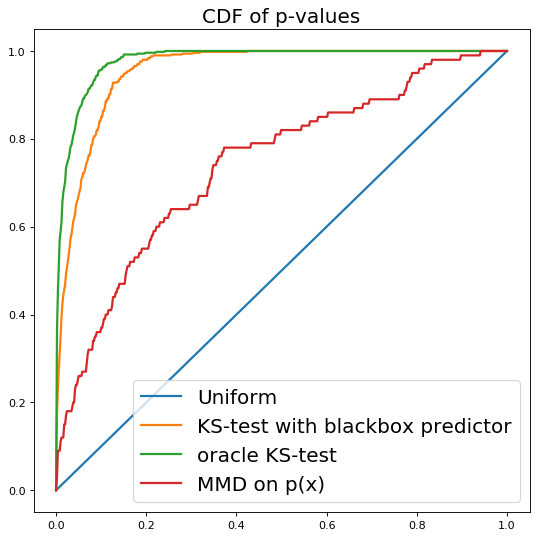

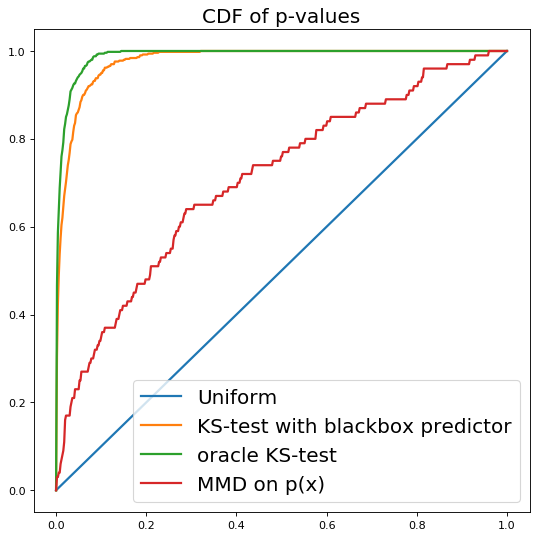

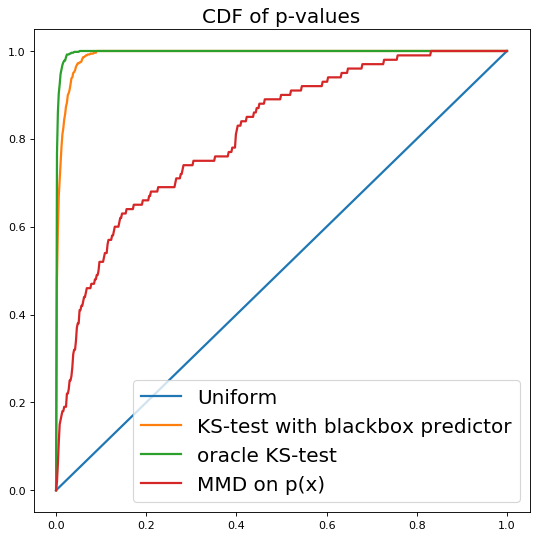

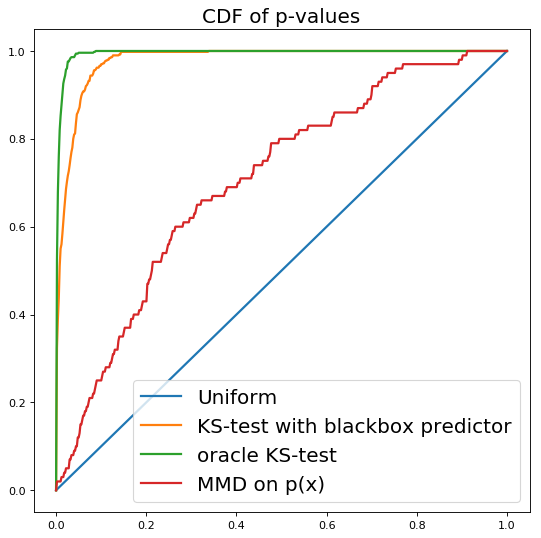

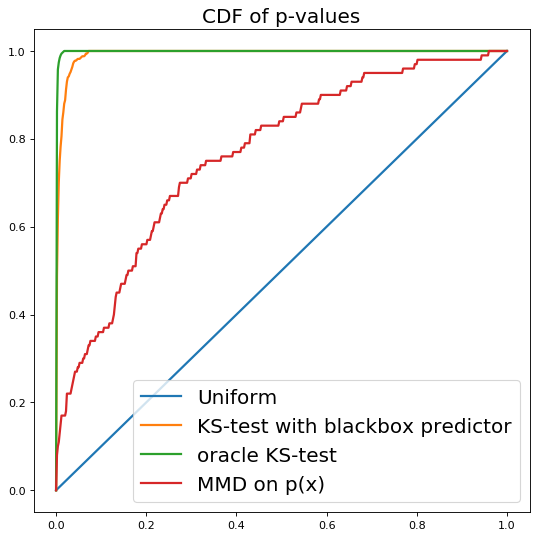

In [16]:
for (delta,item1,item2,item3) in zip(deltalist,cdflist,cdflist_oracle,cdflist_x):
    fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    
    delta = int(delta*10)
    xx=  np.linspace(0, 1, num=500)

    cdfpval = item1
    cdfpval_gnd = item2
    cdfpval_x = item3
    plt.plot(xx, xx,linewidth=2)
    plt.plot(xx, cdfpval(xx),linewidth=2)
    plt.plot(xx, cdfpval_gnd(xx),linewidth=2)
    plt.plot(xx, cdfpval_x(xx),linewidth=2)

    plt.legend(['Uniform', 'KS-test with blackbox predictor', 'oracle KS-test','MMD on p(x)'], loc='best',fontsize=18)
    plt.title('CDF of p-values', fontsize=18)
    #fig.savefig("Hypothesis-Testing"+"delta-0"+repr(delta)+".pdf", bbox_inches='tight')